# Livro: Python for Algorithmic Trading

## Dependências

## Especificações da Pesquisa

- Horizonte de previsão: 30 min, 1 hora, 3 horas


## DNN

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

data = pd.read_csv('/home/bene/MachineLearning/TCC/Base de Dados/BPAC_30m_2021.csv') 
data.head()
symbol = "close"
data = pd.DataFrame(data[symbol])
data.head()
data.rename(columns={symbol: 'price'}, inplace=True)

data['return'] = np.log(data['price']/data['price'].shift(1))
data['direction'] = np.where(data['return'] > 0, 1, 0)

lags = 5
cols = []
for lag in range(1, lags + 1):
     col = f'lag_{lag}'
     data[col] = data['return'].shift(lag)
     cols.append(col)
data.dropna(inplace=True)

print(data[cols])

X = data[cols].values
X = X.reshape(len(X),lags,1)
Y = data['direction'].values


         lag_1     lag_2     lag_3     lag_4     lag_5
6    -0.004166  0.000504 -0.003775  0.003144  0.000504
7     0.001391 -0.004166  0.000504 -0.003775  0.003144
8     0.003280  0.001391 -0.004166  0.000504 -0.003775
9     0.001761  0.003280  0.001391 -0.004166  0.000504
10    0.004891  0.001761  0.003280  0.001391 -0.004166
...        ...       ...       ...       ...       ...
5647 -0.002279 -0.000910  0.003646  0.005954  0.010621
5648  0.033658 -0.002279 -0.000910  0.003646  0.005954
5649  0.007474  0.033658 -0.002279 -0.000910  0.003646
5650  0.008288  0.007474  0.033658 -0.002279 -0.000910
5651  0.003902  0.008288  0.007474  0.033658 -0.002279

[5646 rows x 5 columns]


In [2]:
X_train, Y_train = X[:4500], Y[:4500]
X_val, Y_val = X[4500:5000], Y[4500:5000]
X_test, Y_test = X[5000:], Y[5000:]

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((4500, 5, 1), (4500,), (500, 5, 1), (500,), (646, 5, 1), (646,))

In [3]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.layers import LSTM, Input, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, RMSprop
import random


model1=Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(20))
model1.add(Dense(1, activation='sigmoid'))
          
model1.summary()          


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [4]:
cp = ModelCheckpoint('model1/',save_best_only=True)
model1.compile(loss='binary_crossentropy', optimizer= Adam(learning_rate=0.0001),metrics=['accuracy'])

In [5]:
model1.fit(X_train,Y_train,epochs=50, verbose=True, validation_data=(X_val,Y_val),shuffle=False, callbacks=[cp])

Epoch 1/50
137/141 [============================>.] - ETA: 0s - loss: 0.6931 - accuracy: 0.5078

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


141/141 [==============================] - 7s 33ms/step - loss: 0.6931 - accuracy: 0.5076 - val_loss: 0.6931 - val_accuracy: 0.5100
Epoch 2/50
137/141 [============================>.] - ETA: 0s - loss: 0.6930 - accuracy: 0.5139

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


141/141 [==============================] - 4s 29ms/step - loss: 0.6930 - accuracy: 0.5136 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 3/50
139/141 [============================>.] - ETA: 0s - loss: 0.6929 - accuracy: 0.5133

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


141/141 [==============================] - 4s 29ms/step - loss: 0.6929 - accuracy: 0.5136 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 4/50
136/141 [===========================>..] - ETA: 0s - loss: 0.6928 - accuracy: 0.5136

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


141/141 [==============================] - 4s 29ms/step - loss: 0.6928 - accuracy: 0.5136 - val_loss: 0.6929 - val_accuracy: 0.5100
Epoch 5/50
129/141 [==========================>...] - ETA: 0s - loss: 0.6930 - accuracy: 0.5099

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


141/141 [==============================] - 4s 28ms/step - loss: 0.6928 - accuracy: 0.5136 - val_loss: 0.6929 - val_accuracy: 0.5100
Epoch 6/50
141/141 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.5136 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 7/50
141/141 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.5136 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 8/50
141/141 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.5136 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 9/50
141/141 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.5136 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 10/50
141/141 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.5136 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 11/50
141/141 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.5136 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 12/50
14

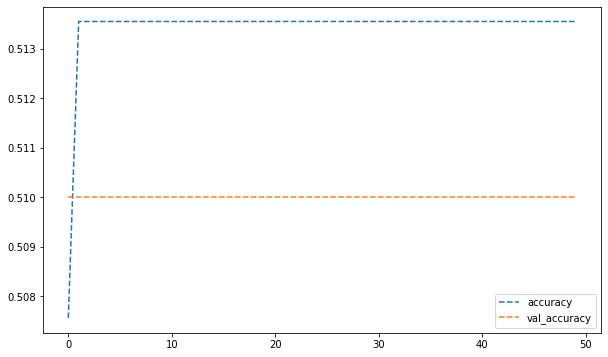

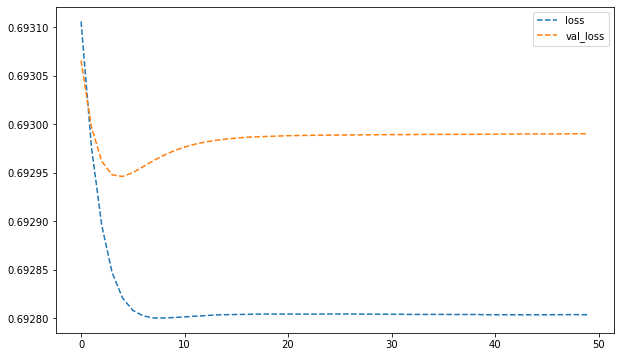

In [6]:
res = pd.DataFrame(model1.history.history)
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--');
res[['loss', 'val_loss']].plot(figsize=(10, 6), style='--');

In [7]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, "Actuals":Y_train})
train_results

141/141 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
0,0.485420,1
1,0.485428,1
2,0.485449,1
3,0.485439,1
4,0.485444,1
...,...,...
4495,0.485414,0
4496,0.485434,0
4497,0.485422,1
4498,0.485420,0


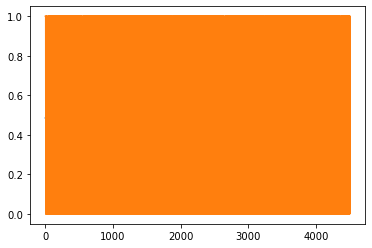

In [8]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:10])
plt.plot(train_results['Actuals'[:10]])